In [1]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')
# setting the default parameters for plot
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams.update({'font.size': 14})

In [2]:
#['Citi Platinum', 'DP_Secured', 'Diamond Preferred', 'Dividend','Forward', 'Simplicity Value', 'ThankYou', 'ThankYou Preferred','ThankYou Premier', 'ThankYou Prestige', 'DoubleCash','DoubleCash_GA', 'Rewards+']
Product = "Simplicity Value"

In [3]:
pnl_data = pd.read_csv('./scienout_Pnl_summary.csv')

FileNotFoundError: [Errno 2] File ./scienout_Pnl_summary.csv does not exist: './scienout_Pnl_summary.csv'

In [347]:
pnl_data.columns

Index(['acq_ym', 'product_def1', 'channel_v2', 'sub_channel_mkt',
       'FINL_INTR_P_RT_CT', 'BALCN_INTRO_MON_CT', 'PURCHASE_APR_RT',
       'new_balcon_ind', 'mob_pernum', 'cards', 'open_cards',
       'bill_actv_cards', 'sales_actv_cards', 'revolvers', 'new_gcl_cards',
       'vol_closed_cards', 'bank_close_cards', 'new_closed_cards',
       'clb_open_bal', 'clb_open_bal_enr_based', 'clb_close_bal_amt',
       'clb_close_bal_amt_enrbased', 'anr', 'revolve_open_bal_enr_based',
       'revolve_close_bal_amt', 'revolve_close_bal_enr_based', 'revolve_anr',
       'clb_payments', 'clb_purchase_sales', 'clb_totl_sales_incl_bt',
       'clb_balcon_amt', 'clb_cash_sales', 'clb_late_fees', 'clb_ocl_fees',
       'clb_bad_chk_fee', 'clb_ua_annl_fee', 'clb_ua_balc_fee',
       'clb_cash_adv_fee', 'clb_balc_fee_wo', 'clb_totl_fees',
       'clb_interchange', 'clb_ACCT_AFF_REBATE_AMT', 'clb_cycle_interest',
       'clb_totl_interest_amt', 'clb_interest_wo', 'clb_COF', 'clb_gcl',
       'clb_reco

In [348]:
import os
os.chdir("D:/Citi_detail_data")
acq_data = pd.read_csv('./scienout_Acq_summary.csv')

acq_data["BALCN_INTRO_MON_CT"]=acq_data["BALCN_INTRO_MON_CT"].fillna(0)
acq_data["FINL_INTR_P_RT_CT"]=acq_data["FINL_INTR_P_RT_CT"].fillna(0)
acq_data["new_balcon_ind"]=acq_data["new_balcon_ind"].fillna(0)


In [349]:
acq_data_sliced = (
    acq_data
    .loc[((acq_data['product_def'].str.strip().isin(['Simplicity Value']))),
         [ 'BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT', 'cards']]
    .groupby([ 'BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT'])
    .sum()
    .copy()
)


Promo_level = acq_data_sliced.sort_values(by=['cards'], ascending=False)

Promo_level["Promo%"] = Promo_level["cards"]/Promo_level["cards"].sum()
Promo_level["Promo%"] = Promo_level["Promo%"].round(2)
print(Promo_level)
print()
Promo_level.to_csv(Product+"_promo_level.csv")

                                        cards  Promo%
BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT                 
21                 21                 2308292    0.45
18                 18                 1637438    0.32
21                 12                 1041686    0.20
12                 12                   74708    0.01
15                 15                   56671    0.01
18                 12                   23202    0.00
24                 12                    8056    0.00
9                  9                     3480    0.00
24                 0                     3033    0.00
12                 0                     2357    0.00
21                 0                     1812    0.00
7                  0                     1163    0.00
18                 0                     1122    0.00
7                  7                      910    0.00
21                 18                     624    0.00
15                 0                      457    0.00
21                 15       

In [350]:
top_promo_c = Promo_level.loc[Promo_level["Promo%"]>=0.1,:]
top_promo_c=top_promo_c.reset_index()
top_promo_c.loc[top_promo_c.index.max()+1,"BALCN_INTRO_MON_CT"] = 0
top_promo_c.loc[top_promo_c.index.max(),"FINL_INTR_P_RT_CT"] = 0

In [351]:

top_promo_c

,BALCN_INTRO_MON_CT,FINL_INTR_P_RT_CT,cards,Promo%
0,21.0,21.0,2308292.0,0.45
1,18.0,18.0,1637438.0,0.32
2,21.0,12.0,1041686.0,0.20
3,0.0,0.0,NaN,NaN


In [352]:
acq_data = acq_data.loc[acq_data["product_def"]==Product,:]
acq_data["Promo_level"] = "Others"
for i in range(top_promo_c.shape[0]):
    bal = top_promo_c.loc[i,"BALCN_INTRO_MON_CT"]
    p = top_promo_c.loc[i,"FINL_INTR_P_RT_CT"]
    acq_data["Promo_level"] = np.where(((acq_data["BALCN_INTRO_MON_CT"]==bal)&(acq_data["FINL_INTR_P_RT_CT"]==p)),str(bal)+"_"+str(p),acq_data["Promo_level"])

In [353]:
acq_data_2 = (
    acq_data[['acq_ym', "Promo_level", 'cards']]
    .groupby(['acq_ym', "Promo_level"])
    .sum()
    .copy()
)
acq_data_2 = acq_data_2.reset_index()

In [354]:
acq_data_2 = pd.DataFrame(acq_data_2)

acq_data_2['MTH_CODE'] = pd.to_datetime(acq_data_2['acq_ym'],format='%Y%m')
acq_data_2_c = acq_data_2.reset_index().pivot(index='MTH_CODE',columns='Promo_level',values="cards")
print(acq_data_2_c)



Promo_level  18.0_18.0  21.0_12.0  21.0_21.0   Others
MTH_CODE                                             
2013-01-01     41448.0        NaN     1303.0  18595.0
2013-02-01     37917.0        NaN    14358.0  11748.0
2013-03-01     40973.0        NaN    21514.0   6702.0
2013-04-01     45482.0        NaN    20576.0   6581.0
2013-05-01     41947.0        NaN    11632.0   4671.0
...                ...        ...        ...      ...
2020-02-01        86.0    43718.0      188.0    124.0
2020-03-01        67.0    47226.0       59.0    123.0
2020-04-01        27.0    30433.0       22.0    189.0
2020-05-01         8.0     9614.0        NaN     48.0
2020-06-01      1055.0     6933.0        NaN     23.0

[90 rows x 4 columns]


Promo Acq by Monthly Vintage


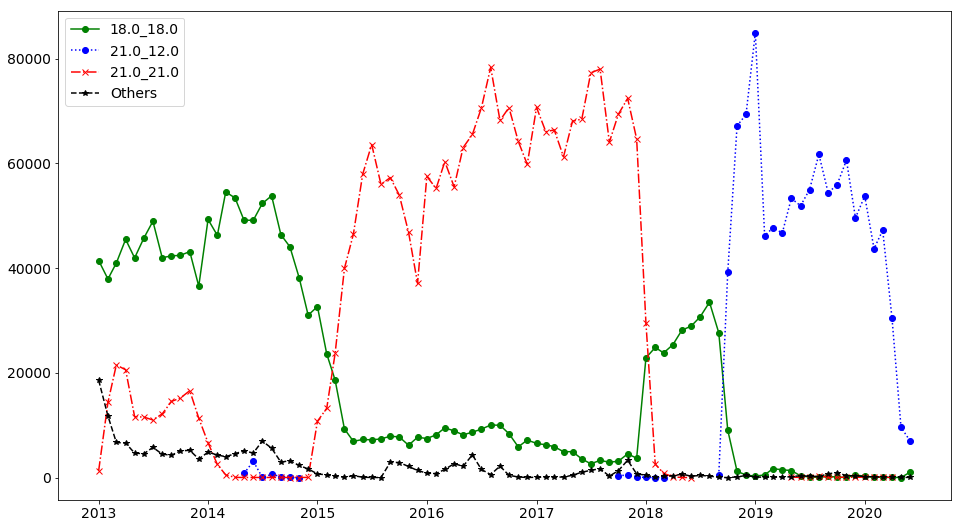

In [355]:
col_n = list(acq_data_2_c.columns)
marker_v = ["o","o","x","*","D","P","<",">","8","s","+","H","4","x","*","D","P"]
color_v = ['green','blue','red','black','brown','yellow','orange','purple','pink','grey','cyan','magenta','gold','firebrick','lawngreen','navy','crimson']
line_v = ['-',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':']
# plotting the graph
print("Promo Acq by Monthly Vintage")
#output['Actual '].plot(color='green', marker="o", legend=True)
for i in range(len(col_n)):
    plt.plot(acq_data_2_c[col_n[i]],color=color_v[i], marker=marker_v[i],linestyle=line_v[i],label=col_n[i])
#    if ((ylim_low_a.value + ylim_high_a.value)!=0):
#        plt.ylim(ylim_low_a.value,ylim_high_a.value)
    plt.legend(loc="upper left")

In [356]:

acq_data = pd.read_csv('./scienout_Acq_summary.csv')


In [357]:
acq_data_sliced = (
    acq_data
    .loc[((acq_data['product_def'].str.strip().isin(['Simplicity Value']))),
         [ 'BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT',"new_balcon_ind", 'cards']]
    .groupby([ 'BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT','new_balcon_ind'])
    .sum()
    .copy()
)


Promo_level = acq_data_sliced.sort_values(by=['cards'], ascending=False)

Promo_level["Promo%"] = Promo_level["cards"]/Promo_level["cards"].sum()
Promo_level["Promo%"] = Promo_level["Promo%"].round(2)
print(Promo_level)
print()
Promo_level.to_csv(Product+"_promo_level.csv")

                                                       cards  Promo%
BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT new_balcon_ind                 
21                 21                1.0             1262397    0.24
                                     0.0             1045895    0.20
18                 18                0.0              928359    0.18
                                     1.0              708815    0.14
21                 12                1.0              603832    0.12
                                     0.0              437517    0.08
12                 12                0.0               49053    0.01
15                 15                0.0               37123    0.01
12                 12                1.0               25655    0.00
15                 15                1.0               19548    0.00
18                 12                1.0               14543    0.00
                                     0.0                8659    0.00
24                 12             

In [358]:
top_promo = Promo_level.loc[Promo_level["Promo%"]>=0.07,:]
top_promo=top_promo.reset_index()
top_promo.loc[top_promo.index.max()+1,"BALCN_INTRO_MON_CT"] = 0
top_promo.loc[top_promo.index.max(),"FINL_INTR_P_RT_CT"] = 0
top_promo.loc[top_promo.index.max(),"new_balcon_ind"] = 0
top_promo.loc[top_promo.index.max()+1,"BALCN_INTRO_MON_CT"] = 0
top_promo.loc[top_promo.index.max(),"FINL_INTR_P_RT_CT"] = 0
top_promo.loc[top_promo.index.max(),"new_balcon_ind"] = 1

In [359]:

top_promo

,BALCN_INTRO_MON_CT,FINL_INTR_P_RT_CT,new_balcon_ind,cards,Promo%
0,21.0,21.0,1.0,1262397.0,0.24
1,21.0,21.0,0.0,1045895.0,0.20
2,18.0,18.0,0.0,928359.0,0.18
3,18.0,18.0,1.0,708815.0,0.14
4,21.0,12.0,1.0,603832.0,0.12
5,21.0,12.0,0.0,437517.0,0.08
6,0.0,0.0,0.0,NaN,NaN
7,0.0,0.0,1.0,NaN,NaN


In [360]:
acq_data = acq_data.loc[((acq_data["product_def"]==Product)),:]
acq_data["Promo_level"] = "Others"
for i in range(top_promo.shape[0]):
    bal = top_promo.loc[i,"BALCN_INTRO_MON_CT"]
    p = top_promo.loc[i,"FINL_INTR_P_RT_CT"]
    ind = top_promo.loc[i,"new_balcon_ind"]
    acq_data["Promo_level"] = np.where(((acq_data["BALCN_INTRO_MON_CT"]==bal)&(acq_data["FINL_INTR_P_RT_CT"]==p)&(acq_data["new_balcon_ind"]==ind)),str(bal)+"_"+str(p)+"_"+str(ind),acq_data["Promo_level"])

In [361]:
acq_data_2 = (
    acq_data[['acq_ym', "Promo_level", 'cards']]
    .groupby(['acq_ym', "Promo_level"])
    .sum()
    .copy()
)
acq_data_2 = acq_data_2.reset_index()

In [362]:
acq_data_2 = pd.DataFrame(acq_data_2)

acq_data_2['MTH_CODE'] = pd.to_datetime(acq_data_2['acq_ym'],format='%Y%m')
acq_data_2_c = acq_data_2.reset_index().pivot(index='MTH_CODE',columns='Promo_level',values="cards")
print(acq_data_2_c)



Promo_level  18.0_18.0_0.0  18.0_18.0_1.0  21.0_12.0_0.0  21.0_12.0_1.0  \
MTH_CODE                                                                  
2013-01-01         21707.0        19741.0            NaN            NaN   
2013-02-01         19972.0        17945.0            NaN            NaN   
2013-03-01         21866.0        19107.0            NaN            NaN   
2013-04-01         24603.0        20879.0            NaN            NaN   
2013-05-01         23768.0        18179.0            NaN            NaN   
...                    ...            ...            ...            ...   
2020-02-01            53.0           33.0        16100.0        27618.0   
2020-03-01            35.0           32.0        18692.0        28534.0   
2020-04-01            19.0            8.0        12323.0        18110.0   
2020-05-01             6.0            2.0         5145.0         4469.0   
2020-06-01           791.0            NaN         6385.0          211.0   

Promo_level  21.0_21.0_0

Promo Acq Balcon=1 by Monthly Vintage


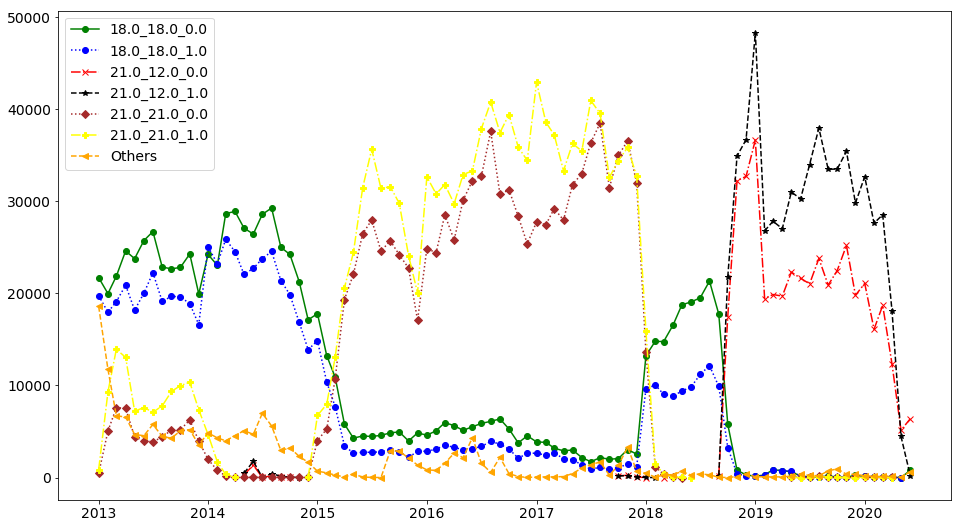

In [363]:
col_n = list(acq_data_2_c.columns)
marker_v = ["o","o","x","*","D","P","<",">","8","s","+","H","4","x","*","D","P"]
color_v = ['green','blue','red','black','brown','yellow','orange','purple','pink','grey','cyan','magenta','gold','firebrick','lawngreen','navy','crimson']
line_v = ['-',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':']
# plotting the graph
print("Promo Acq Balcon=1 by Monthly Vintage")
#output['Actual '].plot(color='green', marker="o", legend=True)
for i in range(len(col_n)):
    plt.plot(acq_data_2_c[col_n[i]],color=color_v[i], marker=marker_v[i],linestyle=line_v[i],label=col_n[i])
#    if ((ylim_low_a.value + ylim_high_a.value)!=0):
#        plt.ylim(ylim_low_a.value,ylim_high_a.value)
    plt.legend(loc="upper left")

In [364]:
acq_data = pd.read_csv('./scienout_Acq_summary.csv')


In [365]:
acq_data_sliced = (
    acq_data
    .loc[((acq_data['product_def'].str.strip().isin(['Simplicity Value']))),
         [ 'channel_v2', 'cards']]
    .groupby([ 'channel_v2'])
    .sum()
    .copy()
)


Promo_level = acq_data_sliced.sort_values(by=['cards'], ascending=False)

Promo_level["Ch%"] = Promo_level["cards"]/Promo_level["cards"].sum()
Promo_level["Ch%"] = Promo_level["Ch%"].round(2)
print(Promo_level)
print()
Promo_level.to_csv(Product+"_Ch_level.csv")

              cards   Ch%
channel_v2               
Internet    2800810  0.54
Phase       1953460  0.38
AltCh        335916  0.07
NPS           75040  0.01
un-known        102  0.00



In [366]:
top_promo_ch = Promo_level.loc[Promo_level["Ch%"]>=0.05,:]
top_promo_ch=top_promo_ch.reset_index()

In [367]:

top_promo_ch

,channel_v2,cards,Ch%
0,Internet,2800810,0.54
1,Phase,1953460,0.38
2,AltCh,335916,0.07


In [368]:
acq_data = acq_data.loc[acq_data["product_def"]==Product,:]
acq_data["ch_level"] = "Others"
for i in range(top_promo_ch.shape[0]):
    ch = top_promo_ch.loc[i,"channel_v2"]
    acq_data["ch_level"] = np.where(((acq_data["channel_v2"]==ch)),str(ch),acq_data["ch_level"])

In [369]:
acq_data_2 = (
    acq_data[['acq_ym', "ch_level", 'cards']]
    .groupby(['acq_ym', "ch_level"])
    .sum()
    .copy()
)
acq_data_2 = acq_data_2.reset_index()

In [370]:
acq_data_2 = pd.DataFrame(acq_data_2)

acq_data_2['MTH_CODE'] = pd.to_datetime(acq_data_2['acq_ym'],format='%Y%m')
acq_data_2_c = acq_data_2.reset_index().pivot(index='MTH_CODE',columns='ch_level',values="cards")
print(acq_data_2_c)



ch_level     AltCh  Internet  Others    Phase
MTH_CODE                                     
2013-01-01  8566.0   18855.0  3157.0  30768.0
2013-02-01  7591.0   16569.0  1168.0  38695.0
2013-03-01  8026.0   18670.0  1658.0  40835.0
2013-04-01  8006.0   22770.0  1324.0  40539.0
2013-05-01  7860.0   23840.0  1843.0  24707.0
...            ...       ...     ...      ...
2020-02-01  1153.0   31152.0     NaN  11811.0
2020-03-01   746.0   37701.0     NaN   9028.0
2020-04-01   152.0   19156.0     NaN  11363.0
2020-05-01   138.0    6264.0     NaN   3268.0
2020-06-01   168.0    6259.0     NaN   1584.0

[90 rows x 4 columns]


Channel by Monthly Vintage


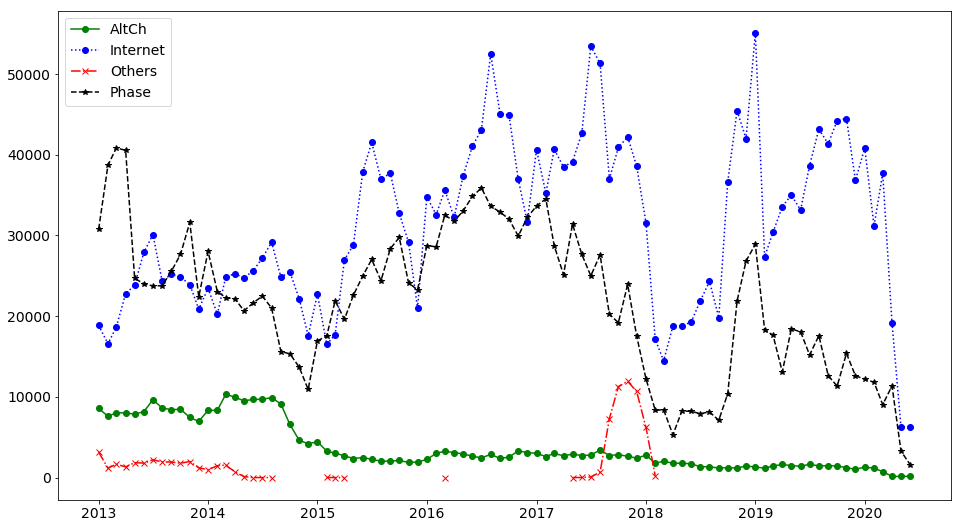

In [371]:
col_n = list(acq_data_2_c.columns)
marker_v = ["o","o","x","*","D","P","<",">","8","s","+","H","4","x","*","D","P"]
color_v = ['green','blue','red','black','brown','yellow','orange','purple','pink','grey','cyan','magenta','gold','firebrick','lawngreen','navy','crimson']
line_v = ['-',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':']
# plotting the graph
print("Channel by Monthly Vintage")
#output['Actual '].plot(color='green', marker="o", legend=True)
for i in range(len(col_n)):
    plt.plot(acq_data_2_c[col_n[i]],color=color_v[i], marker=marker_v[i],linestyle=line_v[i],label=col_n[i])
#    if ((ylim_low_a.value + ylim_high_a.value)!=0):
#        plt.ylim(ylim_low_a.value,ylim_high_a.value)
    plt.legend(loc="upper left")

In [372]:
'BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT','new_balcon_ind'

('BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT', 'new_balcon_ind')

In [373]:
acq_data = pd.read_csv('./scienout_Acq_summary.csv')


In [374]:
acq_data_sliced = (
    acq_data
    .loc[((acq_data['product_def'].str.strip().isin(['Simplicity Value']))),
         [ 'channel_v2','BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT','new_balcon_ind', 'cards']]
    .groupby([ 'channel_v2','BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT','new_balcon_ind'])
    .sum()
    .copy()
)


Promo_level = acq_data_sliced.sort_values(by=['cards'], ascending=False)

Promo_level["Ch%"] = Promo_level["cards"]/Promo_level["cards"].sum()
Promo_level["Ch%"] = Promo_level["Ch%"].round(2)
print(Promo_level)
print()
Promo_level.to_csv(Product+"_Ch_level.csv")

                                                                 cards   Ch%
channel_v2 BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT new_balcon_ind              
Internet   21                 21                1.0             641450  0.12
                                                0.0             630921  0.12
Phase      21                 21                1.0             578362  0.11
Internet   18                 18                0.0             461376  0.09
           21                 12                1.0             425299  0.08
...                                                                ...   ...
un-known   21                 21                1.0                 37  0.00
Phase      15                 12                1.0                 29  0.00
Internet   12                 0                 1.0                 18  0.00
           7                  0                 1.0                  7  0.00
AltCh      0                  18                0.0                  1  0.00

In [380]:
top_promo_ch["jn"] = 1
top_promo_c["jn"] = 1
top_promo = pd.merge(top_promo_c,top_promo_ch,on="jn",how="outer")


In [386]:
bal_ind = pd.DataFrame([[0,1],[1,1]],columns=["ind","jn"])

top_promo = pd.merge(top_promo,bal_ind,on="jn",how="outer")


In [387]:
#top_promo = Promo_level.loc[Promo_level["Ch%"]>=0.01,:]
top_promo=top_promo.reset_index()

In [388]:

top_promo

,level_0,index,BALCN_INTRO_MON_CT,FINL_INTR_P_RT_CT,cards_x,Promo%,jn,channel_v2,cards_y,Ch%,ind
0,0,0,21.0,21.0,2308292.0,0.45,1,Internet,2800810,0.54,0
1,1,0,21.0,21.0,2308292.0,0.45,1,Internet,2800810,0.54,1
2,2,1,21.0,21.0,2308292.0,0.45,1,Phase,1953460,0.38,0
3,3,1,21.0,21.0,2308292.0,0.45,1,Phase,1953460,0.38,1
4,4,2,21.0,21.0,2308292.0,0.45,1,AltCh,335916,0.07,0
5,5,2,21.0,21.0,2308292.0,0.45,1,AltCh,335916,0.07,1
6,6,3,18.0,18.0,1637438.0,0.32,1,Internet,2800810,0.54,0
7,7,3,18.0,18.0,1637438.0,0.32,1,Internet,2800810,0.54,1
8,8,4,18.0,18.0,1637438.0,0.32,1,Phase,1953460,0.38,0
9,9,4,18.0,18.0,1637438.0,0.32,1,Phase,1953460,0.38,1


In [391]:
acq_data = acq_data.loc[acq_data["product_def"]==Product,:]
acq_data["Promo_level"] = "Others"
for i in range(top_promo.shape[0]):
    ch = top_promo.loc[i,"channel_v2"]
    bal = top_promo.loc[i,"BALCN_INTRO_MON_CT"]
    p = top_promo.loc[i,"FINL_INTR_P_RT_CT"]
    ind = top_promo.loc[i,"ind"]
    acq_data["Promo_level"] = np.where(((acq_data["BALCN_INTRO_MON_CT"]==bal)&(acq_data["FINL_INTR_P_RT_CT"]==p)&(acq_data["new_balcon_ind"]==ind)&(acq_data["channel_v2"]==ch)),ch+"_"+str(bal)+"_"+str(p)+"_"+str(ind),acq_data["Promo_level"])

In [393]:
acq_data_2 = (
    acq_data[['acq_ym', "Promo_level", 'cards']]
    .groupby(['acq_ym', "Promo_level"])
    .sum()
    .copy()
)
acq_data_2 = acq_data_2.reset_index()

In [394]:
acq_data_2 = pd.DataFrame(acq_data_2)

acq_data_2['MTH_CODE'] = pd.to_datetime(acq_data_2['acq_ym'],format='%Y%m')
acq_data_2_c = acq_data_2.reset_index().pivot(index='MTH_CODE',columns='Promo_level',values="cards")
print(acq_data_2_c)



Promo_level  AltCh_18.0_18.0_0  AltCh_18.0_18.0_1  AltCh_21.0_12.0_0  \
MTH_CODE                                                               
2013-01-01              5296.0             3265.0                NaN   
2013-02-01              4961.0             2628.0                NaN   
2013-03-01              5282.0             2743.0                NaN   
2013-04-01              5143.0             2863.0                NaN   
2013-05-01              5076.0             2783.0                NaN   
...                        ...                ...                ...   
2020-02-01                 NaN                NaN              629.0   
2020-03-01                 NaN                NaN              392.0   
2020-04-01                 NaN                NaN               89.0   
2020-05-01                 NaN                NaN               98.0   
2020-06-01                 NaN                NaN              156.0   

Promo_level  AltCh_21.0_12.0_1  AltCh_21.0_21.0_0  AltCh_21.0_2

In [427]:
acq_data_2_c.columns

Index(['AltCh_18.0_18.0_0', 'AltCh_18.0_18.0_1', 'AltCh_21.0_12.0_0',
       'AltCh_21.0_12.0_1', 'AltCh_21.0_21.0_0', 'AltCh_21.0_21.0_1',
       'Internet_18.0_18.0_0', 'Internet_18.0_18.0_1', 'Internet_21.0_12.0_0',
       'Internet_21.0_12.0_1', 'Internet_21.0_21.0_0', 'Internet_21.0_21.0_1',
       'Others', 'Phase_18.0_18.0_0', 'Phase_18.0_18.0_1', 'Phase_21.0_12.0_0',
       'Phase_21.0_12.0_1', 'Phase_21.0_21.0_0', 'Phase_21.0_21.0_1'],
      dtype='object', name='Promo_level')

Channel by Monthly Vintage


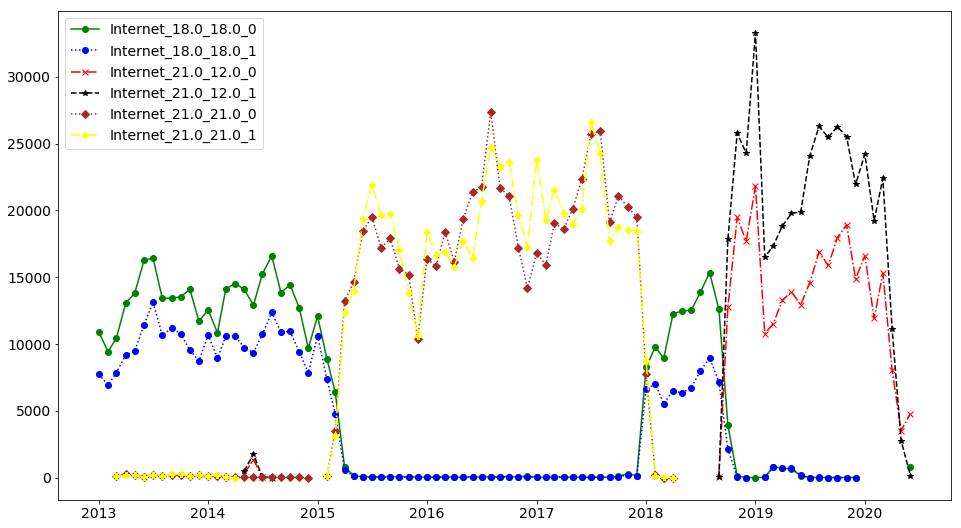

In [428]:
col_n = [  'Internet_18.0_18.0_0', 'Internet_18.0_18.0_1', 'Internet_21.0_12.0_0','Internet_21.0_12.0_1', 'Internet_21.0_21.0_0', 'Internet_21.0_21.0_1',]

marker_v = ["o","o","x","*","D","P","<",">","8","s","+","H","4","x","*","D","P"]
color_v = ['green','blue','red','black','brown','yellow','orange','purple','pink','grey','cyan','magenta','gold','firebrick','lawngreen','navy','crimson']
line_v = ['-',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':']
# plotting the graph
print("Channel by Monthly Vintage")
#output['Actual '].plot(color='green', marker="o", legend=True)
for i in range(len(col_n)):
    plt.plot(acq_data_2_c[col_n[i]],color=color_v[i], marker=marker_v[i],linestyle=line_v[i],label=col_n[i])
#    if ((ylim_low_a.value + ylim_high_a.value)!=0):
#        plt.ylim(ylim_low_a.value,ylim_high_a.value)
    plt.legend(loc="upper left")

In [396]:
pnl_data["product_def1"].unique()

array(['Citi Platinum', 'DP_Secured', 'Diamond Preferred', 'Dividend',
       'Forward', 'Simplicity Value', 'ThankYou', 'ThankYou Preferred',
       'ThankYou Premier', 'ThankYou Prestige', 'DoubleCash',
       'DoubleCash_GA', 'Rewards+'], dtype=object)

In [397]:
pnl_data = pnl_data.loc[pnl_data["product_def1"]==Product,:]
pnl_data.shape


(417722, 81)

In [408]:
pnl_data["Promo_level"] = "Others"
for i in range(top_promo_c.shape[0]):
    bal = top_promo_c.loc[i,"BALCN_INTRO_MON_CT"]
    p = top_promo_c.loc[i,"FINL_INTR_P_RT_CT"]
    pnl_data["Promo_level"] = np.where(((pnl_data["BALCN_INTRO_MON_CT"]==bal)&(pnl_data["FINL_INTR_P_RT_CT"]==p)),str(bal)+"_"+str(p),pnl_data["Promo_level"])

In [416]:
reqd_cols_pnl = ['acq_ym', 'Promo_level', 'mob_pernum',"new_balcon_ind","open_cards","clb_purchase_sales","new_closed_cards"]

In [421]:
pnl_data_sliced = (
    pnl_data[reqd_cols_pnl]
        .groupby( ['Promo_level', 'mob_pernum']).sum().copy().reset_index())

In [422]:
pnl_data_sliced 

,Promo_level,mob_pernum,acq_ym,new_balcon_ind,open_cards,clb_purchase_sales,new_closed_cards
0,18.0_18.0,1,681316858,1642,746361,6.138314e+07,0
1,18.0_18.0,2,766417764,1858,1604442,7.440601e+08,8514
2,18.0_18.0,3,765005239,1856,1601571,7.539913e+08,8254
3,18.0_18.0,4,763995219,1853,1601641,5.306862e+08,4796
4,18.0_18.0,5,762379195,1849,1598815,4.241661e+08,4601
...,...,...,...,...,...,...,...
339,Others,86,37241041,88,20842,2.970841e+06,269
340,Others,87,32812331,80,18663,2.427955e+06,263
341,Others,88,24156259,59,15760,1.954579e+06,282
342,Others,89,14695018,36,12714,1.605252e+06,245


In [425]:
pnl_data_sliced = pd.DataFrame(pnl_data_sliced)

pnl_data_sliced["Sales"]= pnl_data_sliced["clb_purchase_sales"]/pnl_data_sliced["open_cards"]
pnl_data_sliced_c = pnl_data_sliced.reset_index().pivot(index='mob_pernum',columns='Promo_level',values="Sales")
print(pnl_data_sliced_c)



Promo_level   18.0_18.0   21.0_12.0   21.0_21.0      Others
mob_pernum                                                 
1             82.243231   36.941860   66.896342   60.902718
2            463.750107  259.937907  434.515809  368.169449
3            470.782322  314.006248  465.944430  371.072734
4            331.339039  235.171104  328.043337  257.583304
5            265.300278  192.886278  261.050532  206.423726
...                 ...         ...         ...         ...
86           150.766150         NaN  127.343964  142.541082
87           146.117964         NaN  121.575588  130.094596
88           144.875118         NaN  127.762847  124.021488
89           143.702922         NaN  128.366556  126.258628
90           146.083186         NaN  146.756016  136.550952

[90 rows x 4 columns]


Promo by Monthly Vintage


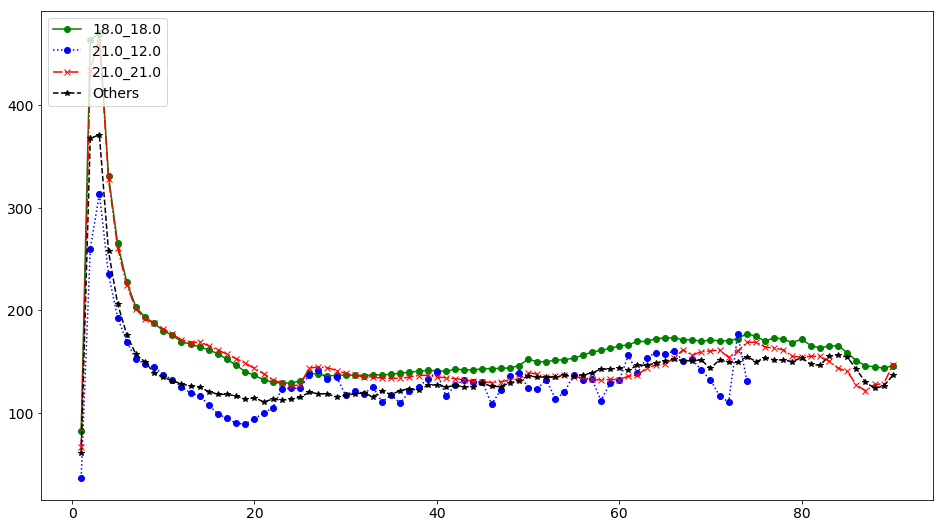

In [426]:
col_n = list(pnl_data_sliced_c.columns)
marker_v = ["o","o","x","*","D","P","<",">","8","s","+","H","4","x","*","D","P"]
color_v = ['green','blue','red','black','brown','yellow','orange','purple','pink','grey','cyan','magenta','gold','firebrick','lawngreen','navy','crimson']
line_v = ['-',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':','-.','--',':']
# plotting the graph
print("Promo by Monthly Vintage")
#output['Actual '].plot(color='green', marker="o", legend=True)
for i in range(len(col_n)):
    plt.plot(pnl_data_sliced_c[col_n[i]],color=color_v[i], marker=marker_v[i],linestyle=line_v[i],label=col_n[i])
#    if ((ylim_low_a.value + ylim_high_a.value)!=0):
#        plt.ylim(ylim_low_a.value,ylim_high_a.value)
    plt.legend(loc="upper left")

In [10]:
def create_calendar_ym(row):
    acq_ym, mob_pernum = row.name[0], row.name[3]
    acq_ym_dt = datetime(acq_ym//100, acq_ym%100, 1)
    cal_ym = acq_ym_dt + relativedelta(months=mob_pernum)
    cal_ym_str = cal_ym.strftime('%Y%m')
    return int(cal_ym_str)

In [11]:
pnl_data_sliced['cal_ym'] = pnl_data_sliced.apply(create_calendar_ym, axis=1)

pnl_data_sliced.set_index(keys=['cal_ym'], append=True, inplace=True)

In [12]:
del pnl_data

In [13]:
pnl_data_sliced

pnl_cards  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym              
201301 12                 12                1          201302       1857   
                                            2          201303       5182   
                                            3          201304       5134   
                                            4          201305       5153   
                                            5          201306       5148   
...                                                                  ...   
202006 12                 12                1          202007          1   
       15                 15                1          202007          2   
       18                 18                1          202007          1   
       21                 0                 1          202007         11   
                          12                1          202007       3556   

                                                               open_cards  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym               
201301 12                 12                1          201302        1852   
                                            2          201303        5137   
                                            3          201304        5126   
                                            4          201305        5137   
                                            5          201306        5135   
...                                                                   ...   
202006 12                 12                1          202007           1   
       15                 15                1          202007           2   
       18                 18                1          202007           1   
       21                 0                 1          202007          11   
                          12                1          202007        3532   

                                                               bill_actv_cards  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym                    
201301 12                 12                1          201302              258   
                                            2          201303             3617   
                                            3          201304             4458   
                                            4          201305             4660   
                                            5          201306             4735   
...                                                                        ...   
202006 12                 12                1          202007                0   
       15                 15                1          202007                0   
       18                 18                1          202007                0   
       21                 0                 1          202007                0   
                          12                1          202007              311   

                                                               sales_actv_cards  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym                     
201301 12                 12                1          201302               257   
                                            2          201303              3575   
                                            3          201304              3328   
                                            4          201305              2975   
                                            5          201306              3023   
...                                                                         ...   
202006 12                 12                1          202007                 0   
       15                 15                1          202007                 0   
       18                 18                1          202007                 0   
       21                 0                 1          202007                 0   
         

In [14]:
bseg_data = pd.read_csv('./scienout_Bseg_summary.csv')
bseg_data = (bseg_data
             .loc[bseg_data['mob_pernum'].notna(),:])
bseg_data['mob_pernum'] = bseg_data['mob_pernum'].astype('int')

In [15]:
reqd_cols_bseg = [col for col in bseg_data.columns
                  if col not in ['product_def1', 'channel_v2', 'sub_channel_mkt',
                                 'PURCHASE_APR_RT', 'new_balcon_ind']]

In [16]:
bseg_data_sliced = (
    bseg_data
    .loc[((bseg_data['product_def1'].str.strip().isin(['Simplicity Value']))),
         reqd_cols_bseg]
    .groupby(['acq_ym', 'BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT', 'mob_pernum'])
    .sum()
    .copy())

In [17]:
bseg_data_sliced['cal_ym'] = bseg_data_sliced.apply(create_calendar_ym, axis=1)

bseg_data_sliced.set_index(keys=['cal_ym'], append=True, inplace=True)

In [18]:
del bseg_data

In [19]:
bseg_data_sliced

Intro_intr  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym               
201301 12                 12                1          201302         0.0   
                                            2          201303         0.0   
                                            3          201304         0.0   
                                            4          201305         0.0   
                                            5          201306         0.0   
...                                                                   ...   
202005 21                 0                 1          202006         0.0   
                                            2          202007         0.0   
                          12                1          202006         0.0   
                                            2          202007         0.0   
202006 21                 12                1          202007         0.0   

                                                                 Intro_bal  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym                
201301 12                 12                1          201302    374668.23   
                                            2          201303   8013302.90   
                                            3          201304  11107111.06   
                                            4          201305  12168487.24   
                                            5          201306  12873638.06   
...                                                                    ...   
202005 21                 0                 1          202006         0.00   
                                            2          202007    114915.40   
                          12                1          202006   1891763.01   
                                            2          202007  29630664.91   
202006 21                 12                1          202007   1427759.63   

                                                               gotofix_intr  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym                 
201301 12                 12                1          201302           0.0   
                                            2          201303           0.0   
                                            3          201304           0.0   
                                            4          201305           0.0   
                                            5          201306           0.0   
...                                                                     ...   
202005 21                 0                 1          202006           0.0   
                                            2          202007           0.0   
                          12                1          202006           0.0   
                                            2          202007           0.0   
202006 21                 12                1          202007           0.0   

                                                               gotofix_bal  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym                
201301 12                 12                1          201302          0.0   
                                            2          201303          0.0   
                                            3          201304          0.0   
                                            4          201305          0.0   
                                            5          201306          0.0   
...                                                                    ...   
202005 21                 0                 1          202006          0.0   
                                            2          202007          0.0   
                          12                1          202006          0.0   
                                            2          202007          0.0   
202006 21                 12                1          202007          0.0   

   

In [20]:
metrics_by_bd_pd = (acq_data_sliced
                    .join(pnl_data_sliced)
                    .join(bseg_data_sliced))

In [21]:
metrics_by_bd_pd

cards  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym          
201301 12                 12                1          201302   5205   
                                            2          201303   5205   
                                            3          201304   5205   
                                            4          201305   5205   
                                            5          201306   5205   
...                                                              ...   
202006 12                 12                1          202007      3   
       15                 15                1          202007      2   
       18                 18                1          202007   1055   
       21                 0                 1          202007     18   
                          12                1          202007   6933   

                                                               pnl_cards  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym              
201301 12                 12                1          201302       1857   
                                            2          201303       5182   
                                            3          201304       5134   
                                            4          201305       5153   
                                            5          201306       5148   
...                                                                  ...   
202006 12                 12                1          202007          1   
       15                 15                1          202007          2   
       18                 18                1          202007          1   
       21                 0                 1          202007         11   
                          12                1          202007       3556   

                                                               open_cards  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym               
201301 12                 12                1          201302        1852   
                                            2          201303        5137   
                                            3          201304        5126   
                                            4          201305        5137   
                                            5          201306        5135   
...                                                                   ...   
202006 12                 12                1          202007           1   
       15                 15                1          202007           2   
       18                 18                1          202007           1   
       21                 0                 1          202007          11   
                          12                1          202007        3532   

                                                               bill_actv_cards  \
acq_ym BALCN_INTRO_MON_CT FINL_INTR_P_RT_CT mob_pernum cal_ym                    
201301 12                 12                1          201302              258   
                                            2          201303             3617   
                                            3          201304             4458   
                                            4          201305             4660   
                                            5          201306             4735   
...                                                                        ...   
202006 12                 12                1          202007                0   
       15                 15                1          202007                0   
       18                 18                1          202007                0   
       21                 0                 1          202007                0   
                          12                1          202007              311   

                                                               sales

In [22]:
metrics_by_bd_pd_deindx = metrics_by_bd_pd.reset_index()

In [23]:
metrics_by_bd_pd_21_21 = (
    metrics_by_bd_pd_deindx
    .loc[(metrics_by_bd_pd_deindx.BALCN_INTRO_MON_CT == 21) &
         (metrics_by_bd_pd_deindx.FINL_INTR_P_RT_CT == 21),:]
    .drop(['BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT'], axis=1)
    .groupby(['acq_ym', 'cal_ym', 'mob_pernum'])
    .sum())

In [24]:
metrics_by_bd_pd_18_18 = (
    metrics_by_bd_pd_deindx
    .loc[(metrics_by_bd_pd_deindx.BALCN_INTRO_MON_CT == 18) &
         (metrics_by_bd_pd_deindx.FINL_INTR_P_RT_CT == 18),:]
    .drop(['BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT'], axis=1)
    .groupby(['acq_ym', 'cal_ym', 'mob_pernum'])
    .sum())

In [25]:
metrics_by_bd_pd_12_12 = (
    metrics_by_bd_pd_deindx
    .loc[(metrics_by_bd_pd_deindx.BALCN_INTRO_MON_CT == 12) &
         (metrics_by_bd_pd_deindx.FINL_INTR_P_RT_CT == 12),:]
    .drop(['BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT'], axis=1)
    .groupby(['acq_ym', 'cal_ym', 'mob_pernum'])
    .sum())

In [26]:
metrics_by_bd_pd_others = (
    metrics_by_bd_pd_deindx
    .loc[
        ~(
            (
                (metrics_by_bd_pd_deindx.BALCN_INTRO_MON_CT == 21) &
                (metrics_by_bd_pd_deindx.FINL_INTR_P_RT_CT == 21)
            ) |
            (
                (metrics_by_bd_pd_deindx.BALCN_INTRO_MON_CT == 18) &
                (metrics_by_bd_pd_deindx.FINL_INTR_P_RT_CT == 18)
            ) |
            (
                (metrics_by_bd_pd_deindx.BALCN_INTRO_MON_CT == 12) &
                (metrics_by_bd_pd_deindx.FINL_INTR_P_RT_CT == 12)
            )
        ),:]
    .drop(['BALCN_INTRO_MON_CT', 'FINL_INTR_P_RT_CT'], axis=1)
    .groupby(['acq_ym', 'cal_ym', 'mob_pernum'])
    .sum())

In [27]:
with pd.ExcelWriter('Metrics_By_Balcon_and_Purchase_Duration_unmerged.xlsx') as xlsx:
    metrics_by_bd_pd_21_21.to_excel(xlsx, sheet_name='21_21', merge_cells=False)
    metrics_by_bd_pd_18_18.to_excel(xlsx, sheet_name='18_18', merge_cells=False)
    metrics_by_bd_pd_12_12.to_excel(xlsx, sheet_name='12_12', merge_cells=False)
    metrics_by_bd_pd_others.to_excel(xlsx, sheet_name='others', merge_cells=False)